In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer

from data.data_loader import load_diabetes_data

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-v0_8-whitegrid')

df = load_diabetes_data()
print('\nNumber of rows and columns in the diabetes data set: ', df.shape)
df.head()


Number of rows and columns in the diabetes data set:  (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


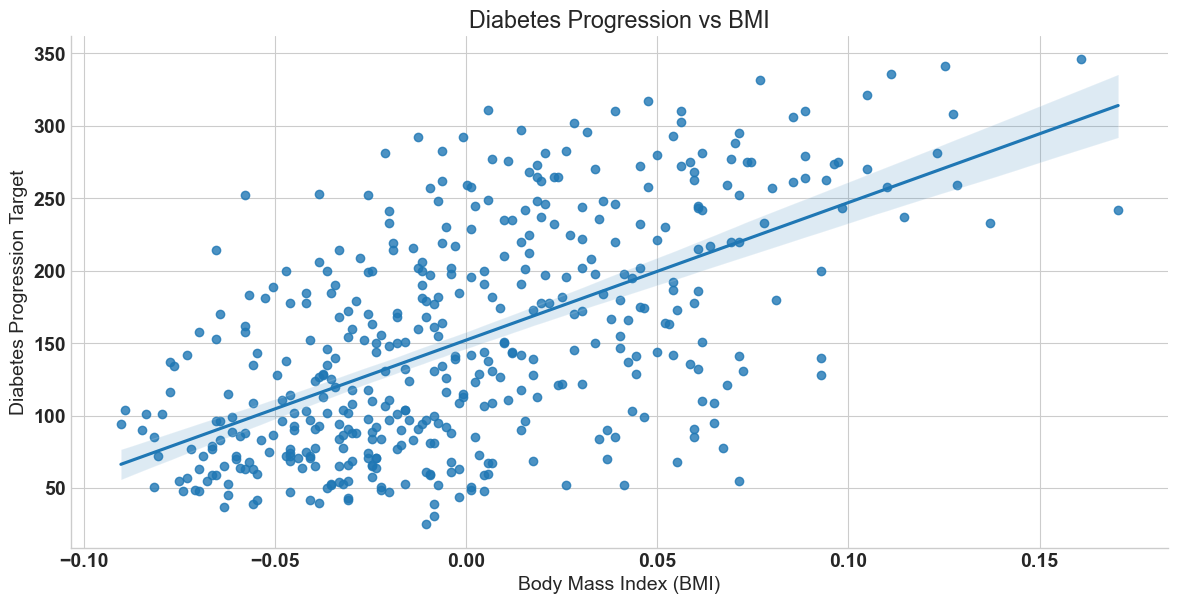

In [44]:
sns.lmplot(x='bmi', y='target', data=df, aspect=2, height=6)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Progression Target')
plt.title('Diabetes Progression vs BMI')
plt.show()

In [45]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


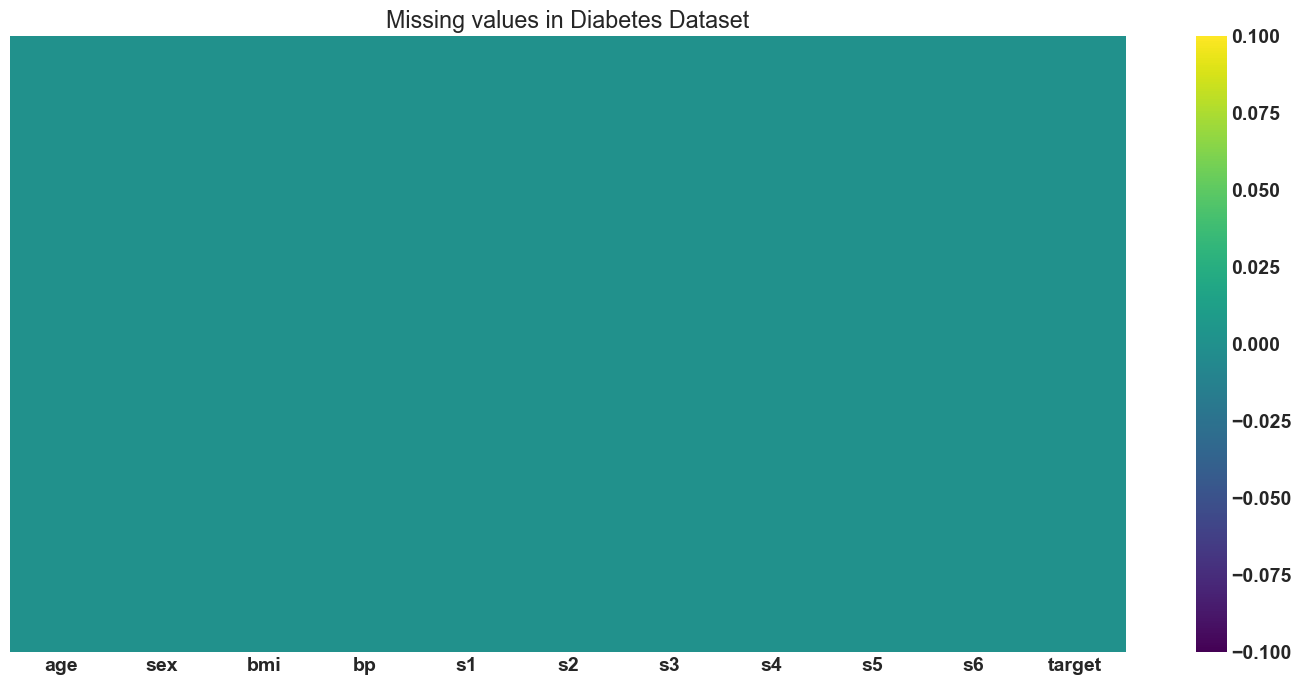

In [46]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing values in Diabetes Dataset')
plt.show()

No missing values in the dataset

<Axes: >

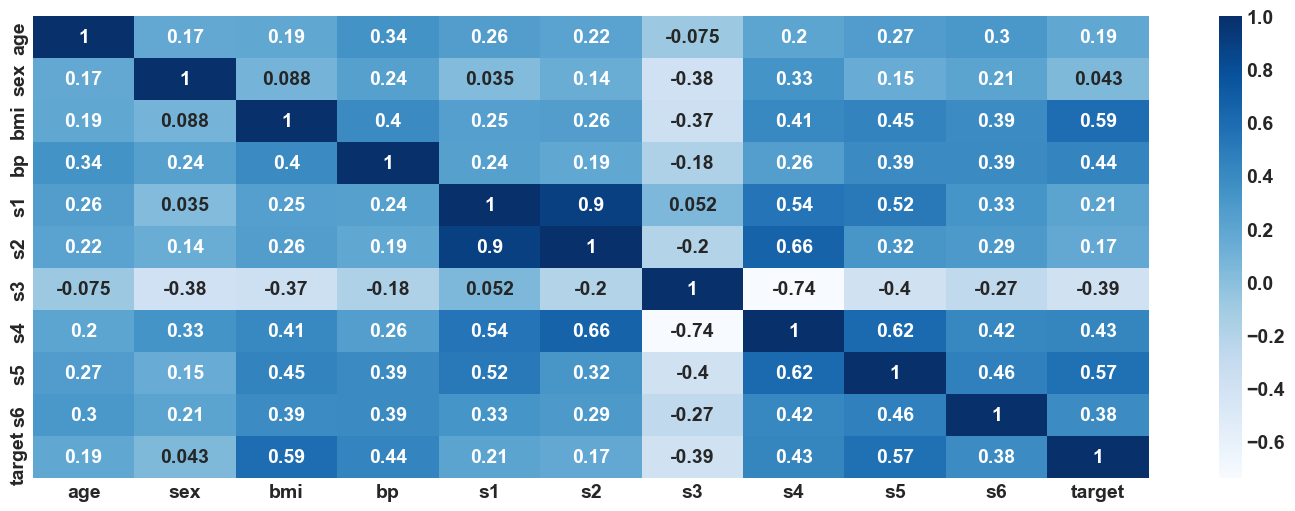

In [47]:
corr = df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(corr, cmap='Blues', annot=True)

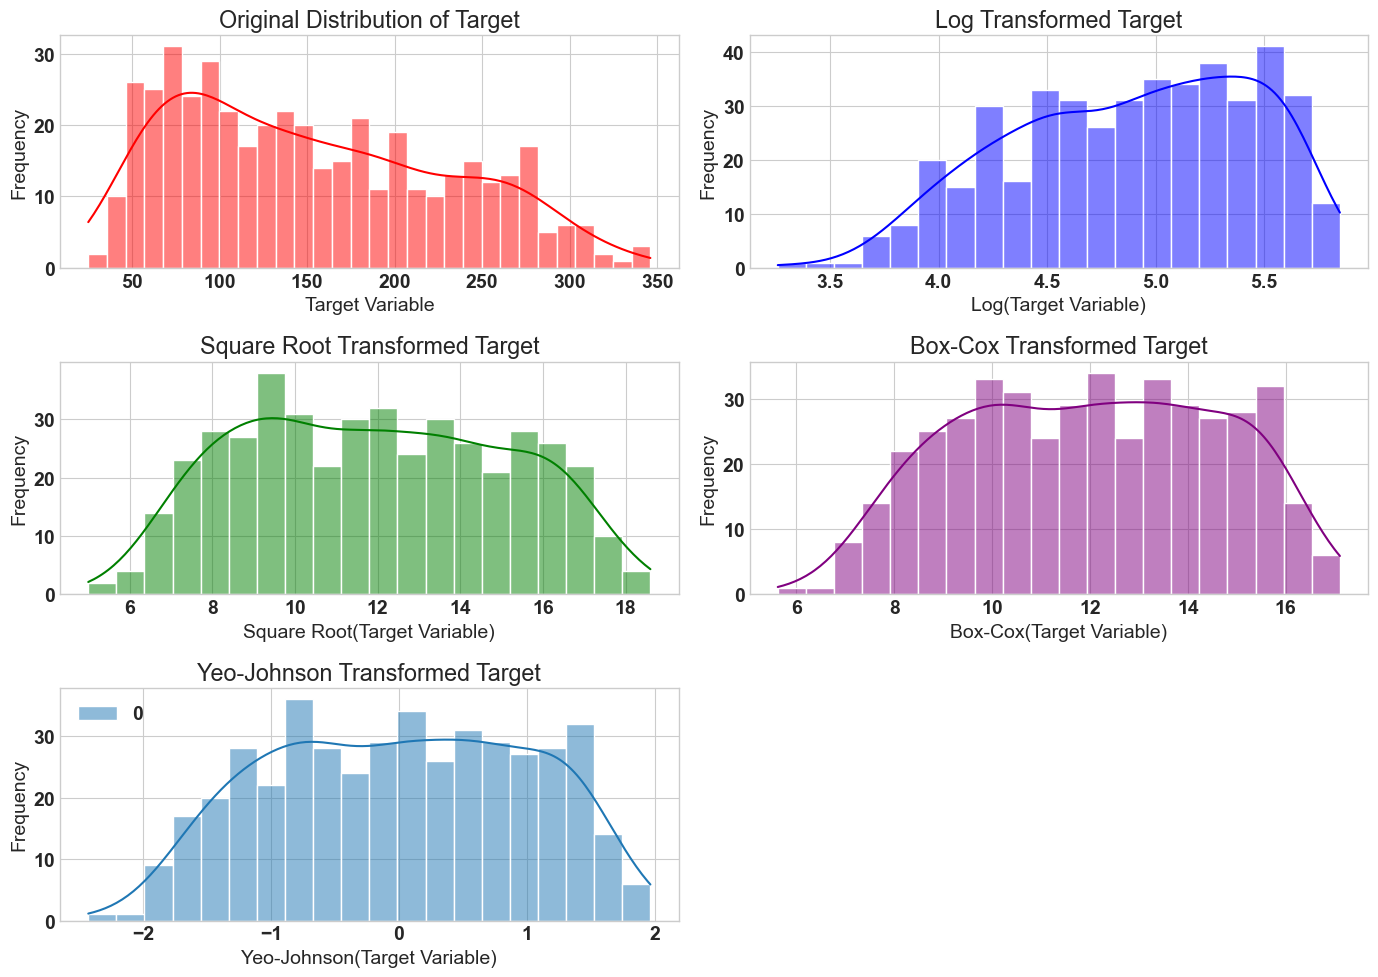

In [55]:

fig, axes = plt.subplots(3, 2, figsize=(14, 10))

log_target = np.log1p(df['target'])

sqrt_target = np.sqrt(df['target'])

boxcox_target, _ = stats.boxcox(df['target'])

pt = PowerTransformer(method='yeo-johnson')
yeo_johnson_target = pt.fit_transform(df[['target']])

sns.histplot(df['target'], bins=30, color='r', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Distribution of Target')
axes[0, 0].set_xlabel('Target Variable')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(log_target, bins=20, color='b', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Log Transformed Target')
axes[0, 1].set_xlabel('Log(Target Variable)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(sqrt_target, bins=20, color='g', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Square Root Transformed Target')
axes[1, 0].set_xlabel('Square Root(Target Variable)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(boxcox_target, bins=20, color='purple', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Box-Cox Transformed Target')
axes[1, 1].set_xlabel('Box-Cox(Target Variable)')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(yeo_johnson_target, bins=20, color='orange', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Yeo-Johnson Transformed Target')
axes[2, 0].set_xlabel('Yeo-Johnson(Target Variable)')
axes[2, 0].set_ylabel('Frequency')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

Using Violin plots to visualize how a continuous target variable changes with a categorical variable (sex)

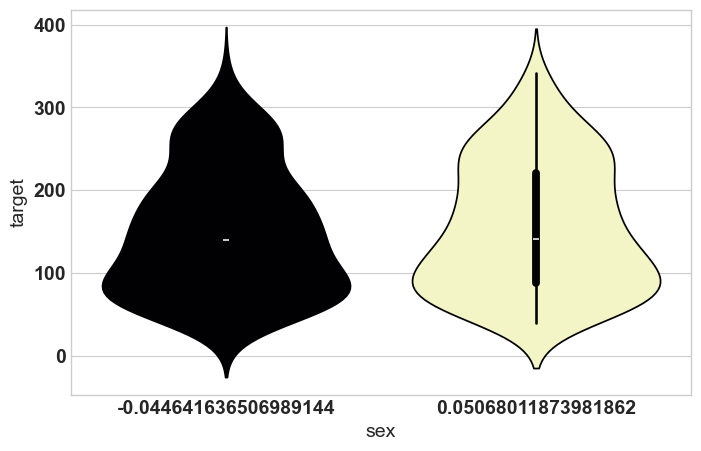

In [65]:
sns.violinplot(x='sex', y='target', data=df, hue='sex', palette='magma', legend=False);

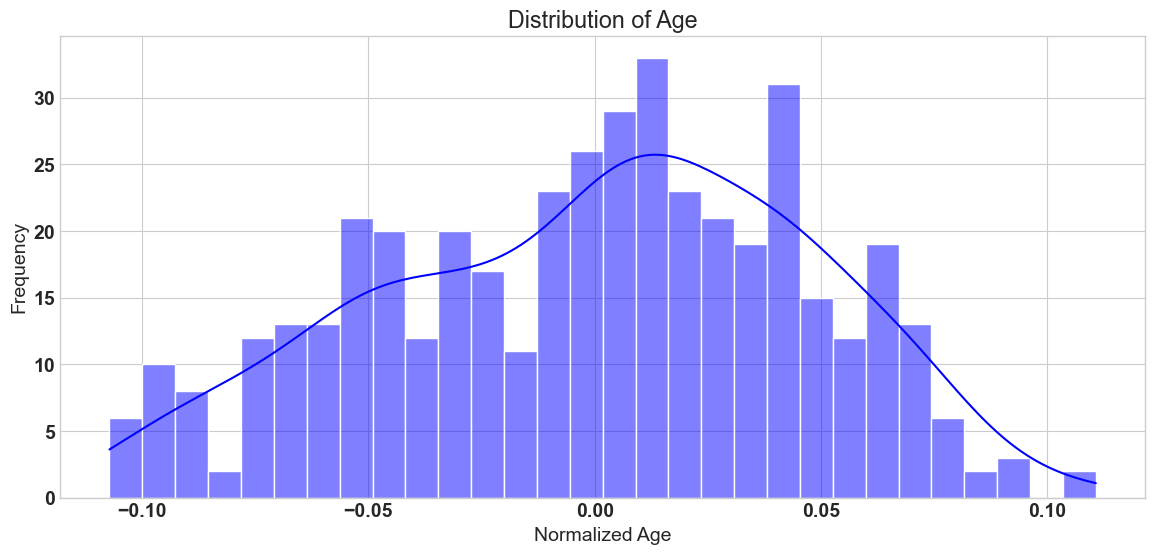

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [68]:
plt.figure(figsize=(14, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Normalized Age')
plt.ylabel('Frequency')
plt.show()

df.head()


Text(0.5, 1.0, 'Scatter plot of Diabetes Target vs BP')

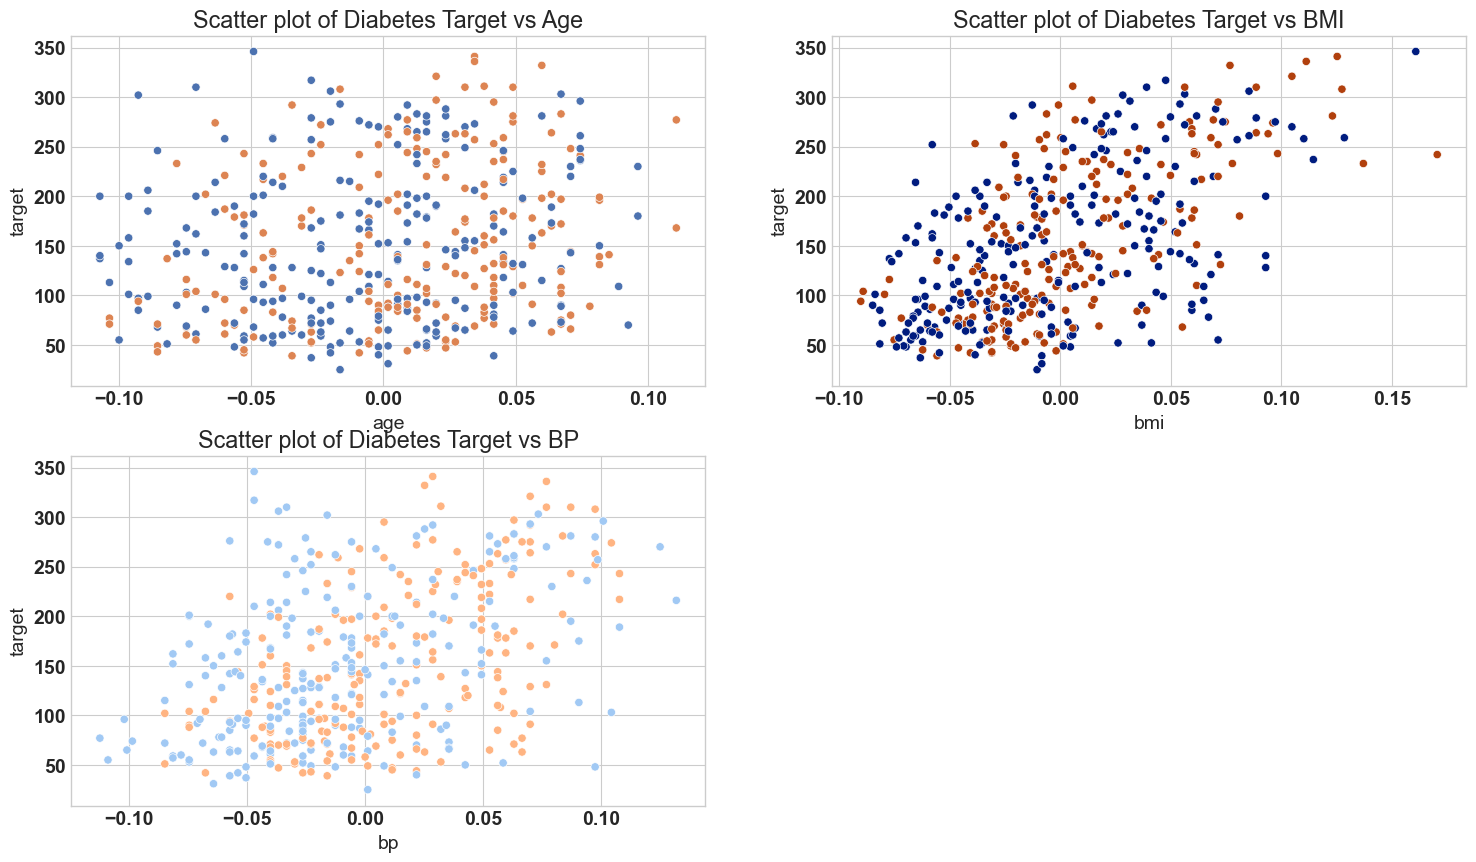

In [81]:

f = plt.figure(figsize=(18,10))

ax = f.add_subplot(221)
sns.scatterplot(x='age', y='target', data=df, palette='deep', hue='sex', legend=False)
ax.set_title('Scatter plot of Diabetes Target vs Age')

ax = f.add_subplot(222)
sns.scatterplot(x='bmi',y='target',data=df,palette='dark',hue='sex',ax=ax, legend=False)
ax.set_title('Scatter plot of Diabetes Target vs BMI')

ax = f.add_subplot(223)
sns.scatterplot(x='bp',y='target',data=df,palette='pastel',hue='sex',ax=ax, legend=False)
ax.set_title('Scatter plot of Diabetes Target vs BP')



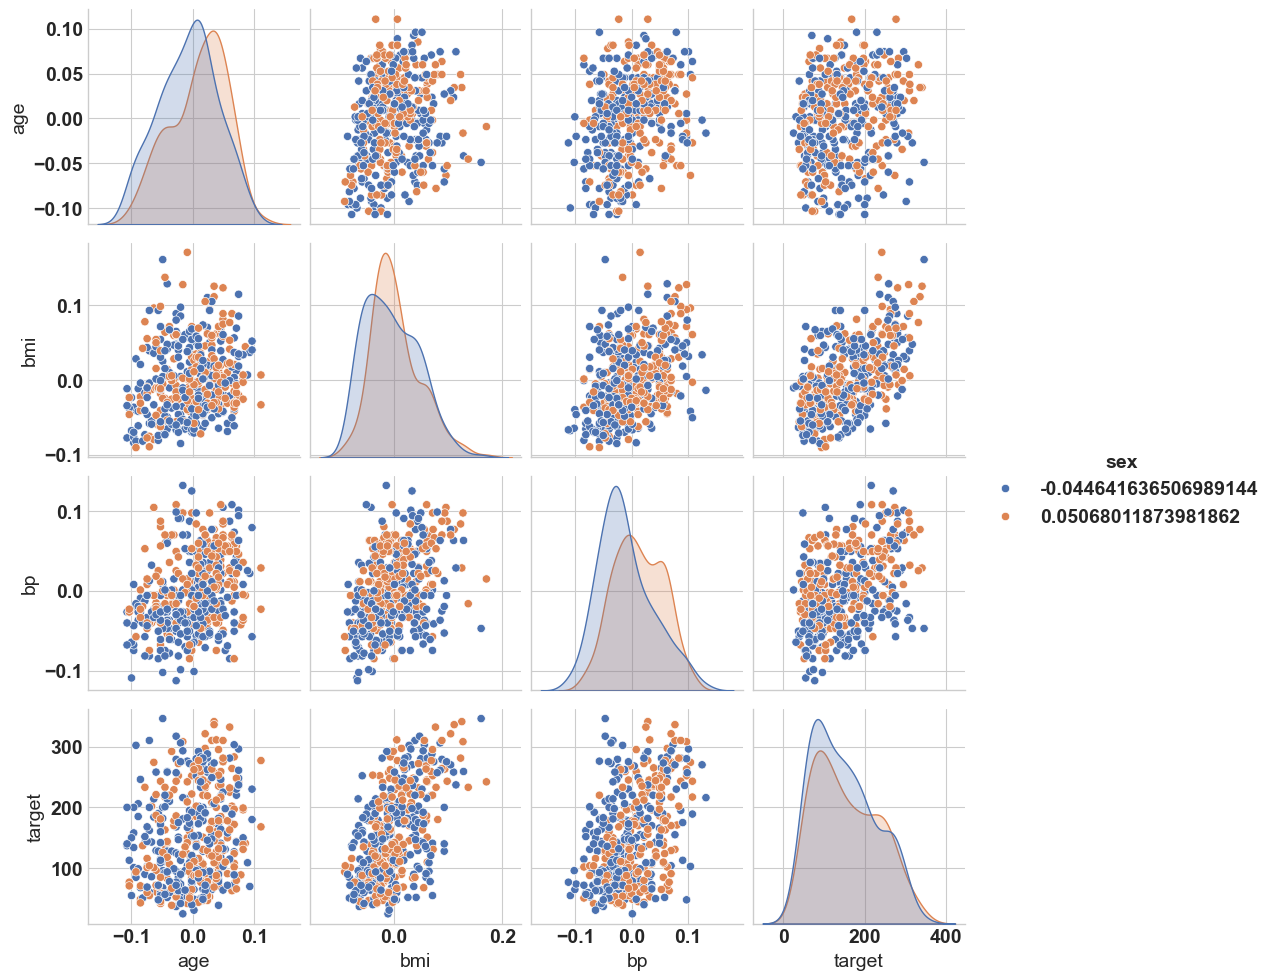

In [83]:
sns.pairplot(df, vars=['age', 'bmi', 'bp', 'target'], palette='deep', hue='sex')
plt.show()
